# Practica 2 
## Mineria de datos


Base de datos de los vinos
- Comenzaremos con lo principal que seria importar librerias,mandar a llamar el archivo, cantidad de filas y columnas,el tipo de datos de las columnas, los nombres de las columnas y una visualizacion de la tabla.

In [47]:
import pandas as pd
import numpy as np
import json

vino = pd.read_csv("vino150k.csv")
vino.shape


(150930, 11)

In [48]:
vino.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [49]:
vino.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Eliminare las columnas que no considere importantes o relevantes para graficar los datos, en este caso quitare las columnas description,designation,region_2(ya que tengo la region uno y tiene varios espacios vacios),variety y winery.


Cambiare el combre de las columnas restantes al español, para que sea mas sencillo identificar las columnas.

Elimine los renglones que tenian valores nulos en puntaje y precio.

In [50]:
vino1=vino.drop([ 'description', 'designation', 'region_2', 'variety', 'winery'],axis=1)
vino2=vino1.rename(columns={'Unnamed: 0':'Id', 'country':'Pais', 'points':'Puntaje','price':'Precio', 'province':'Provincia', 'region_1':'Region'})
vino3=vino2.dropna(subset=['Puntaje','Precio'],axis=0)
vino3.head(20)

,Id,Pais,Puntaje,Precio,Provincia,Region
0,0,US,96,235.0,California,Napa Valley
1,1,Spain,96,110.0,Northern Spain,Toro
2,2,US,96,90.0,California,Knights Valley
3,3,US,96,65.0,Oregon,Willamette Valley
4,4,France,95,66.0,Provence,Bandol
5,5,Spain,95,73.0,Northern Spain,Toro
6,6,Spain,95,65.0,Northern Spain,Toro
7,7,Spain,95,110.0,Northern Spain,Toro
8,8,US,95,65.0,Oregon,Chehalem Mountains
9,9,US,95,60.0,California,Sonoma Coast


## Descripcion estadisitica basica

Hare las estadisticas con respecto al puntaje y al precio, ya que son mis datos numericos.

In [51]:
#Promedio del puntaje
vino2['Puntaje'].mean()

87.8884184721394

In [52]:
#Promedio de los precios
vino2['Precio'].mean()

33.13148249353299

In [53]:
#El minimo del puntaje
vino2['Puntaje'].min()

80

In [54]:
#El maximo del puntaje
vino2['Puntaje'].max()

100

In [55]:
#El minimo de los precios
vino2['Precio'].min()

4.0

In [56]:
#El maximo de los precios
vino2['Precio'].max()

2300.0

In [57]:
#Mediana del puntaje
vino2['Puntaje'].median()

88.0

In [58]:
#Mediana de los precios
vino2['Precio'].median()

24.0

In [59]:
#Varianza de los precios
vino2['Precio'].var()

1319.326635745001

In [60]:
#Desviacion estandar de los precios
vino2['Precio'].std()

36.32253619648552

## Graficas con matplotlib

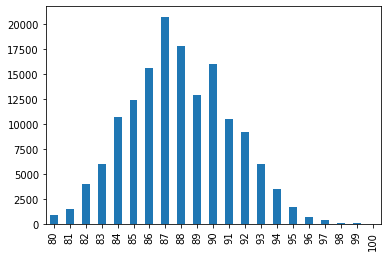

In [61]:
vino2['Puntaje'].value_counts().sort_index().plot.bar()

- Logramos aprecias que la mayor concentracion de los datos en el caso de puntaje esta entre el 87 y el 88, y anteriormente vimos que el promedio del puntaje es 87.88 y la mediana del puntaje es 88. 

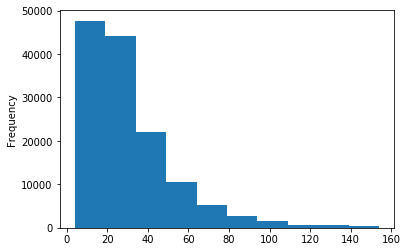

In [62]:
vino2[vino2['Precio'] < 155]['Precio'].plot.hist()

- Comenzamos haciendo que la grafica sea para menos de 155 muestras, para apreciarla de una mejor manera. Claramente vemos que la mayoria de los precios estan concentrados entre el 20 y 30, a su vez nos ayuda mucho saber que la mediana de los precios es 24 y su promedio es 33.13 

## Graficas con seaborn

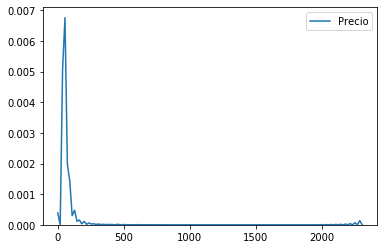

In [63]:
#Importamos 
import seaborn as sns
sns.kdeplot(vino2.query('Precio < 15000').Precio)

- En este caso le puse un tamaño a la grafica de 15000 para apreciar el minimo y el maximo que se tiene de los precios. Como vemos el minimo se aproxima al 0 y el maximo arrebasa los 2000.

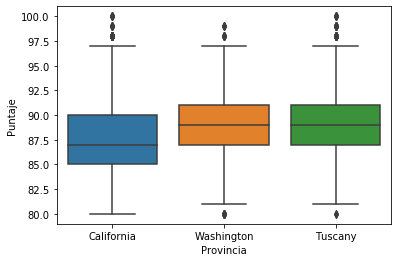

In [64]:
df= vino2[vino2.Provincia.isin(vino2.Provincia.value_counts().head(3).index)]

sns.boxplot(
    x='Provincia',
    y='Puntaje',
    data = df
)

- Se hizo una grafica en la que vemos los datos de california, washington y de tuscany, a simple vista logramos aprecias que el minimo en las 3 provincias oscila entre el 80 y el maximo en el 100. Y que en el caso de washington y tuscany, la mediana esta en el 88 aproximadamente.

## Tareas opcionales

Relacionar al menos 4 graficas con los diferentes tipos de datos con los que se especializa para trabajar.

- Ordinales y Nominales: Variables cualitativas, en su mayoria se pueden utilizar graficas de barras y tambien graficas de pastel.

- Intervalos y Razon: Variables cuantitativas , representa la escala de los valores, se utilizan las marcas de clase para graficar los puntos, que al ser conectados nos dara un poligono.

Realizar una comparacion entre scatter plot y hexplot.

- Un scatter plot simple hace un mapa de cada variable de interes en un espacio bi dimensional, las graficas de scatter plot trabajan mejor con datasets pequeños. A las scatter plot no les va bien cuando los puntos estan en el mismo lugar que otro dentro del mapa. Las graficas de scatter plot trabajan mejor con datasets pequeños, para evitar lo que se conoce como overplotting.

- Un diagrama hexplot agrega puntos en el espacio en hexágonos, y luego colorea esos hexágonos en función de los valores dentro de ellos. Se hace un cluster, por lo que se aprecian mas los valores a comparacion del scatter plot.Para evitar el overplotingse quitan los datos que son muy similares.